In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import cv2

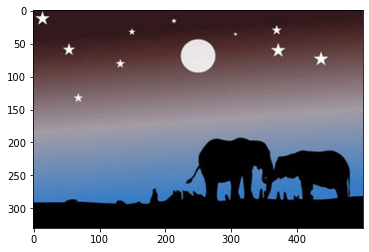

(330, 500, 3)


In [3]:
im=cv2.imread('elephant.jpg')
plt.imshow(im)
plt.show()
print(im.shape)

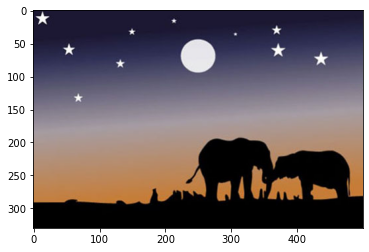

(330, 500, 3)


In [4]:
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)
original_img=im.shape
plt.show()
print(im.shape)

In [5]:
# flatten each channel of the image in linear array so that we get 2D array(each col for each color)

all_pixels = im.reshape((330*500, 3))
print(all_pixels.shape)

# one linear array for each color, (red , green , and blue channel)

(165000, 3)


In [6]:
#Extracting the dominant colors
from sklearn.cluster import KMeans


In [7]:
km = KMeans(n_clusters=4)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [8]:
centers = km.cluster_centers_
centers = np.array(centers, dtype='uint8')
print(centers)

[[174 145 128]
 [ 37  35  64]
 [  1   0   1]
 [ 98  94 117]]


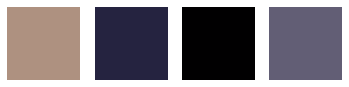

In [9]:
plt.figure(0,figsize=(6,2))

i=1

colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i+=1
    
    colors.append(each_col)
    
    # Color swatch 
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)

plt.show()

In [10]:
#Segmenting our Original array
new_img = np.zeros((330*500, 3), dtype='uint8')
print(new_img.shape)

(165000, 3)


In [11]:
print(colors)
km.labels_

[array([174, 145, 128], dtype=uint8), array([37, 35, 64], dtype=uint8), array([1, 0, 1], dtype=uint8), array([ 98,  94, 117], dtype=uint8)]


array([1, 1, 1, ..., 2, 2, 2])

In [15]:
for i in range(new_img.shape[0]):
    new_img[i]=colors[km.labels_[i]]
    #assigning colors to the new image formed
    
new_img= new_img.reshape((original_img))    

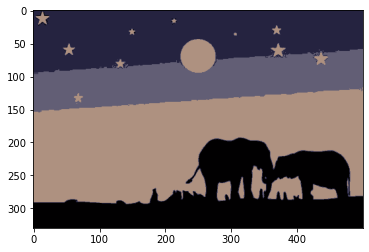

In [16]:
plt.imshow(new_img)
plt.show()